In [1]:
from eodhd import APIClient
import pandas as pd

In [2]:
api_key = "5cb671b0b4a790.35526238"
api = APIClient(api_key)

In [3]:
import json
with open('../industries.json', 'r') as json_file:
    all_industries = json.load(json_file)
sector = 'Consumer Cyclical'
industry_list = all_industries[sector]

In [20]:
limit = 100
offset = 0
all_data = []
from urllib.parse import urlencode
import requests
base_url = "https://eodhd.com/api/screener"

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NYSE"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit

for industry_name in industry_list:
    offset = 0
    while True:
        query_params = {
            'api_token': api_key,
            'sort': 'market_capitalization.desc',
            'filters': f'[["exchange","=","NASDAQ"],["industry","=","{industry_name}"]]',
            'limit': str(limit),
            'offset': str(offset)
        }

        encoded_params = urlencode(query_params)
        final_url = f"{base_url}?{encoded_params}"
        response = requests.get(final_url).json()
        print(response)
        data = response['data']
        if not data:
            break
        all_data.extend(data)
        offset += limit


print(len(all_data))
Hcdf = pd.DataFrame(all_data)
print(Hcdf)

{'data': [{'code': 'OMC', 'name': 'Omnicom Group Inc', 'last_day_data_date': '2024-06-13', 'adjusted_close': 89.39, 'refund_1d': 0.22, 'refund_1d_p': 0.25, 'refund_5d': -0.871, 'refund_5d_p': -0.96, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 17462517760, 'earnings_share': 7.39, 'dividend_yield': 0.0312, 'sector': 'Communication Services', 'industry': 'Advertising Agencies', 'avgvol_1d': 1567589, 'avgvol_200d': 1469517.35}, {'code': 'IPG', 'name': 'Interpublic Group of Companies Inc', 'last_day_data_date': '2024-06-13', 'adjusted_close': 29.9, 'refund_1d': -0.33, 'refund_1d_p': -1.09, 'refund_5d': -0.85, 'refund_5d_p': -2.76, 'exchange': 'US', 'currency_symbol': '$', 'market_capitalization': 11284977664, 'earnings_share': 2.81, 'dividend_yield': 0.0441, 'sector': 'Communication Services', 'industry': 'Advertising Agencies', 'avgvol_1d': 2972599, 'avgvol_200d': 3701011.86}, {'code': 'WPP', 'name': 'WPP PLC ADR', 'last_day_data_date': '2024-06-13', 'adjusted_close'

In [21]:
financial_list = []
for i in range(Hcdf.size):
    try:
        code = Hcdf.loc[i]['code']
        financial = api.get_fundamentals_data(code)
        print(code)
        if financial:
            financial_list.append(financial)
    except Exception as e:
        print(f'error data for {code} : {e}')

OMC
IPG
WPP
EEX
DLX
CCO
BOC
CTV
EVC
TSQ
RL
LEVI
PVH
GIL
VFC
KTB
ZGN
UA
UAA
HBI
OXM
GOOS
FIGS
VNCE
DLA
TJX
BURL
ANF
GPS
AEO
BOOT
CRI
FL
BKE
VSCO
CAL
GES
CURV
JILL
GCO
TLYS
CATO
CVNA
KMX
PAG
LAD
AN
ABG
GPI
SAH
KAR
CARS
CWH
KFS
CANG
CZOO
TM
RACE
STLA
GM
HMC
F
NIO
XPEV
LVWR
ZK
APTV
GPC
MGA
ALV
BWA
LEA
ALSN
MOD
QS
ADNT
PHIN
DAN
AXL
MLR
SMP
PLOW
SES
SRI
HLLY
CYD
HYLN
CPS
SUP
DDS
M
JWN
KSS
EXTO
NKE
DECK
ONON
SKX
BIRK
WWW
DBI
SN
TPX
MHK
WHR
MBC
LEG
LZB
ETD
COOK
HBB
NTZ
NCL
IGT
RSI
SGHC
ACEL
EVRI
AGS
HD
LOW
FND
HVT
LL
BABA
SE
CPNG
CHWY
VIPS
W
ZKH
RVLV
JMIA
RERE
AKA
DTC
LITB
MOGU
MI
FTCHF
CUK
AS
PLNT
GOLF
LTH
YETI
PRKS
MODG
SIX
FUN
VSTO
BOWL
MSGE
XPOF
HLT
IHG
H
WH
CHH
SHCO
GHG
TPR
SIG
CPRI
MOV
MYTE
LANV
ELA
BGI
BALL
AVY
PKG
IP
AMCR
WRK
CCK
GPK
BERY
SON
SEE
SLGN
GEF-B
GEF
AMBP
OI
MYE
PACK
TUP
DSS
ROL
SCI
HRB
BFAM
MCW
CSV
MED
RGS
NYT
PSO
WLY
WLYB
GCI
BC
THO
HOG
PII
LCII
WGO
MPX
DHI
LEN
LEN-B
PHM
NVR
TOL
IBP
MTH
TMHC
KBH
SKY
TPH
MHO
CCS
DFH
GRBK
BZH
HOV
GRBK-PA
LVS
MGM
MTN
BYD
HGV
VAC
MSC
BALY
MCD


In [22]:
def get_price(code):
    date = '2024-03-28'
    price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date=date, to_date=date)
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-01', to_date='2024-04-01')
    if not price:
        price = api.get_eod_historical_stock_market_data(symbol=code + '.US', from_date='2024-04-02', to_date='2024-04-02')
    return price

In [23]:
def get_debt(stock):
    debt1 = None
    debt2 = None
    report = stock['Financials']['Balance_Sheet']['quarterly']
    for key in report:
        debt1 = report[key].get('longTermDebtTotal')
        debt2 = report[key].get('longTermDebt')
        if debt1 and debt2:
            return float(max(debt1, debt2))
        if debt1:
            return float(debt1)
        if debt2:
            return float(debt2)

In [24]:
def get_ebitda(stock):
    ebitda = None
    sum = 0
    cout = 0
    report = stock['Financials']['Income_Statement']['quarterly']
    for key in report:
        ebitda = report[key].get('ebitda')
        if ebitda:
            sum = sum + float(ebitda)
            cout = cout + 1
            if cout == 4:
                return sum


In [25]:
def get_shares(stock):
    share = float(stock['SharesStats']['SharesOutstanding'])
    return share
def get_FCF(stock):
    report = stock['Financials']['Cash_Flow']['quarterly']
    sum = 0
    cout = 0
    for key in report:
        FCF = report[key].get('freeCashFlow')
        if FCF:
            cout = cout + 1
            sum = sum + float(FCF)
            if cout == 4 :
                return sum

In [26]:
def get_EPS(stock):
    earningHistory = stock['Earnings']['History']
    cout = 0
    sum = 0
    for key in earningHistory:
        EPS = earningHistory[key]['epsActual']
        if EPS is not None:
            cout = cout + 1
            sum = sum + float(EPS)
            if cout == 4:
                return sum

In [27]:
def get_dividend(stock):
    sum = 0
    cout = 0
    report = stock['Financials']['Cash_Flow']['quarterly']
    for key in report:
        div = report[key].get('dividendsPaid')
        if div:
            sum = sum + abs(float(div))
            cout = cout + 1
            if cout == 4:
                return sum

In [28]:
Codelist = []
Debtlist = []
divYlist = []
FCFlist = []
EPSlist = []
for stock in financial_list:
    code = stock['General']['Code']
    try:
        price_data = get_price(code)
        price = float(price_data[0]['adjusted_close'])
    except Exception as e:
        print(f"{code} price error: {e}")
        continue
    try:
        debt_o = get_debt(stock)
        if debt_o == 0 or not debt_o:
            print(f"{code} has no debt data in database")
            continue
    except Exception as e:
        print(f"{code} debt: {e}")
        continue
    try:
        ebitda = get_ebitda(stock)
        if not ebitda or ebitda == 0:
            print(f"{code} EBITDA Zero error")
            continue
    except Exception as e:
        print(f"{code} EBITDA error: {e}")
        continue
    try:
        FCF = get_FCF(stock)
        if not FCF or FCF == 0:
            print(f"{code} Couldn't get FCF error")
            continue
    except Exception as e:
        print(f"{code} FCF error: {e}")
        continue
    try:
        share = get_shares(stock)
    except Exception as e:
        print(f"{code} Share doesn't exist error: {e}")
        continue
    try:
        #Calculate FCF Yield
        FCF_Y = FCF/share/price
    except Exception as e:
        print(f"{code} Share probably zero: {e}")
        continue
    try:
        EPS = get_EPS(stock)
        if not EPS or EPS == 0:
            print(f"{code} EPS Zero error")
            continue
    except Exception as e:
        print(f"{code} EPS error: {e}")
        continue
    try:
        #Calculate Debt ratio
        debt = debt_o/ebitda
    except Exception as e:
        print(f"{code} EBITDA zero: {e}")
        continue
    try:
        #Calculate EPS per 
        EPSPS = EPS/price
    except Exception as e:
        print(f"{code} Earning all zero or none: {e}")
        continue
    try:
        dividend = get_dividend(stock)
        if not dividend or dividend == 0:
            print(f'{code} has no Dividend Paid')
            continue
        dividendY = dividend / share / price
    except Exception as e:
        print(f"{code} div calculation error: {e}")
        continue
    FCFlist.append(FCF_Y)
    Codelist.append(code)
    Debtlist.append(debt)
    EPSlist.append(EPSPS)
    divYlist.append(dividendY)


BOC has no Dividend Paid
CTV has no Dividend Paid
UA has no Dividend Paid
UAA has no Dividend Paid
HBI has no Dividend Paid
FIGS has no debt data in database
DLA has no Dividend Paid
BKE has no debt data in database
VSCO has no Dividend Paid
CAL has no debt data in database
JILL has no Dividend Paid
GCO has no Dividend Paid
ABG has no Dividend Paid
CANG has no Dividend Paid
CZOO has no Dividend Paid
XPEV has no Dividend Paid
LVWR has no Dividend Paid
ZK price error: list index out of range
QS has no Dividend Paid
SES has no debt data in database
SRI has no Dividend Paid
HLLY has no Dividend Paid
CYD Couldn't get FCF error
HYLN has no Dividend Paid
EXTO EPS Zero error
DECK has no Dividend Paid
ONON has no debt data in database
BIRK EPS Zero error
MHK has no Dividend Paid
MBC has no Dividend Paid
LZB has no debt data in database
ETD has no debt data in database
COOK has no Dividend Paid
NCL EPS Zero error
RSI has no debt data in database
SGHC has no Dividend Paid
HVT has no debt data in 

In [29]:
print(len(Codelist))
print(len(Debtlist))
print(len(divYlist))
print(len(FCFlist))
print(len(EPSlist))

356
356
356
356
356


In [4]:
df = pd.DataFrame({
    'Code': Codelist,
    'Debt': Debtlist,
    'Dividend Yield': divYlist,
    'EPS Yield': EPSlist,
    'FCF' :  FCFlist
})

datafile_name = f'{sector}.csv'
df.to_csv(datafile_name, index=False)

NameError: name 'Codelist' is not defined

In [5]:
df = pd.read_csv('Consumer Cyclical.csv')

In [6]:
import pandas as pd
top_50s = []
worst_100s = []
positive_df = df[df['Debt'] > 0]

top_50s.append(positive_df.nsmallest(30,'Debt'))
top_50s.append(positive_df.nlargest(30,'Dividend Yield'))
top_50s.append(positive_df.nlargest(30,'EPS Yield'))
top_50s.append(positive_df.nlargest(30,'FCF'))
worst_100s.append(positive_df.nlargest(150, 'Debt'))
worst_100s.append(positive_df.nsmallest(150, 'Dividend Yield'))
worst_100s.append(positive_df.nsmallest(150, 'EPS Yield'))
worst_100s.append(positive_df.nsmallest(150, 'FCF'))

combined_top_50 = pd.concat(top_50s).drop_duplicates().reset_index(drop=True)
combined_worst_100 = pd.concat(worst_100s).drop_duplicates().reset_index(drop=True)
worst_codes = combined_worst_100['Code'].unique()

final_selection = combined_top_50[~combined_top_50['Code'].isin(worst_codes)]

In [7]:
print(final_selection.shape)
print(final_selection)

(21, 5)
     Code       Debt  Dividend Yield  EPS Yield        FCF
1    ATAT 0.00163530      0.18300399 0.23076923 0.70216082
2    CRTO 0.00282410      0.02659259 0.10037069 0.06176453
15    OXM 0.11477991      0.02389335 0.08077754 0.09744574
18    GHG 0.13981292      0.25965307 0.53697749 0.55454921
27   HTHT 0.24244657      0.37862858 0.30930233 0.47398566
30    HMC 2.24964845      7.37734666 0.09642761 2.31516352
37     JD 1.08159793      1.14678948 0.87440471 1.30754082
38   BWMX 1.55535712      1.02682456 1.58790286 3.04467323
44   LOCO 1.46783604      0.36198021 0.08213552 0.09903252
52   GOOS 1.53861386      0.22066075 0.08457711 0.19681046
55   BABA 0.99978844      0.10343498 0.86566873 0.89699905
56    WPP 1.45668532      0.07502802 0.72333600 0.15717793
57   STCN 0.61447803      0.03580019 0.31844046 0.36632522
62   STLA 0.44392686      0.05414945 0.16686991 0.13284807
64      M 1.47757516      0.03360758 0.16105173 0.07360790
68   DOOO 1.80269408      0.02398533 0.14457385 

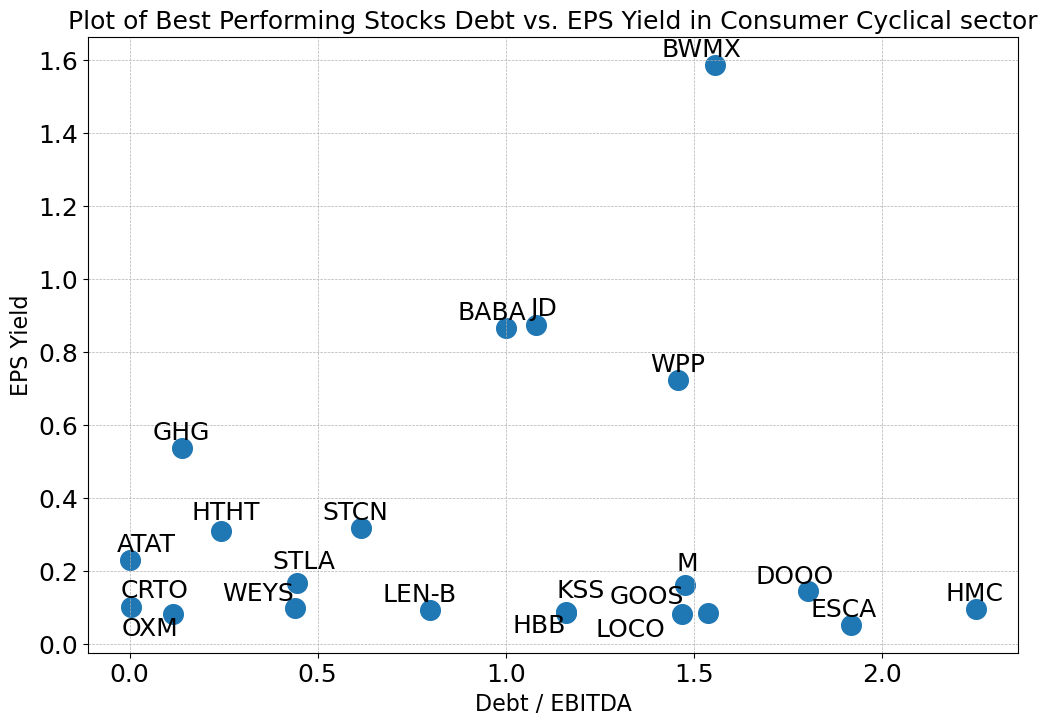

In [12]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('EPS Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)
scatter = plt.scatter(final_selection['Debt'], final_selection['EPS Yield'], s = 200) 

texts = []
for i, row in final_selection.iterrows():
    texts.append(plt.text(row['Debt'], row['EPS Yield'], row['Code'], fontsize=18, ha='right'))

adjust_text(texts)
sector_title = f'{sector} sector'
plt.title('Plot of Best Performing Stocks Debt vs. EPS Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_EPS_fixed.png', bbox_inches='tight')
plt.show()

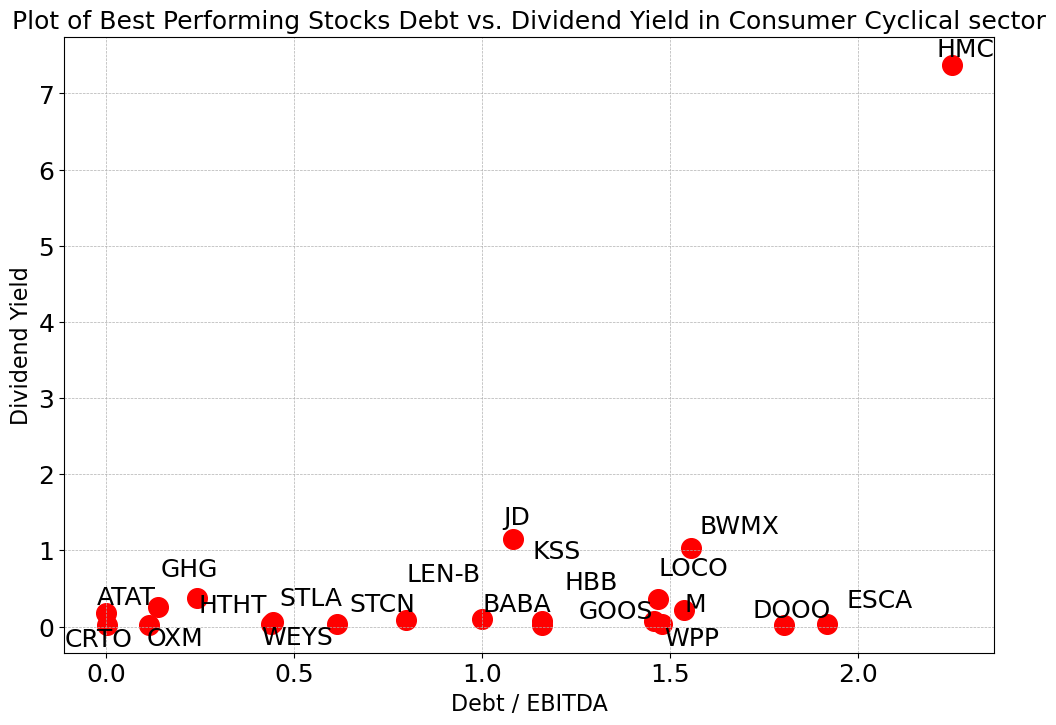

In [13]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('Dividend Yield',fontsize=16)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

plot_data = final_selection[final_selection['Code'] != 'AMTD']
scatter = plt.scatter(plot_data['Debt'], plot_data['Dividend Yield'], c='r',s=200) 

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['Dividend Yield'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)

plt.title('Plot of Best Performing Stocks Debt vs. Dividend Yield in ' + sector_title, fontsize=18)
plt.savefig('Best_Debt_Div_fixed.png', bbox_inches='tight')
plt.show()

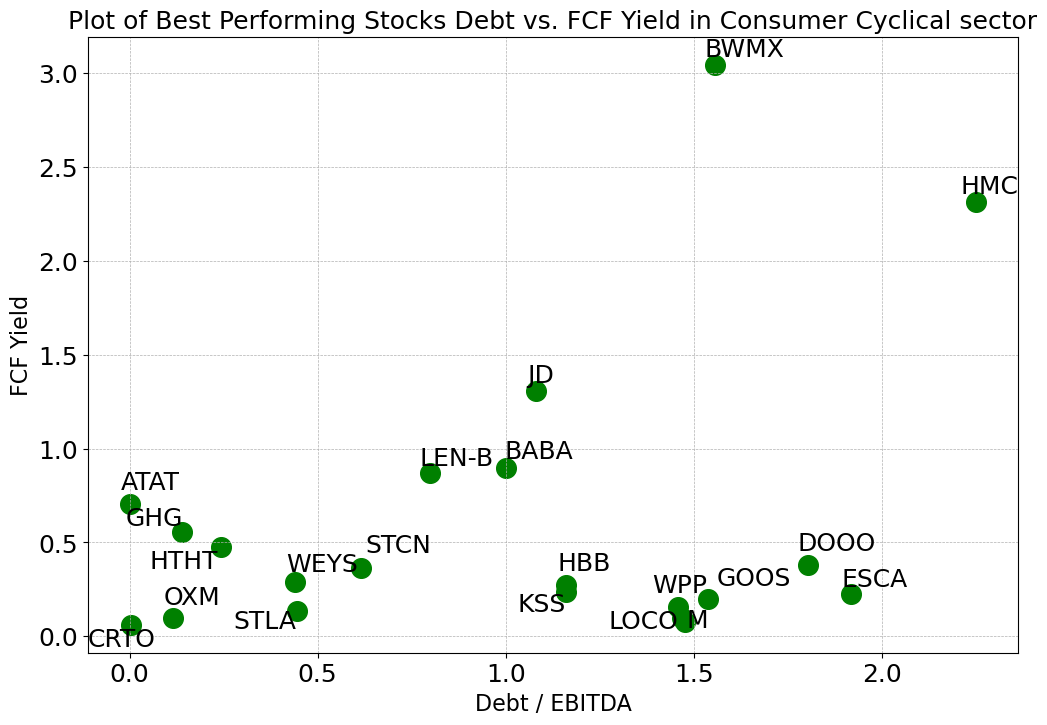

In [9]:
plt.figure(figsize=(12, 8))
plt.xlabel('Debt / EBITDA',fontsize=16)
plt.ylabel('FCF Yield',fontsize=16)
scatter = plt.scatter(plot_data['Debt'], plot_data['FCF'], c='g',s=200) 
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=18)

texts = []
for i, row in plot_data.iterrows():
    texts.append(plt.text(row['Debt'], row['FCF'], row['Code'], fontsize=18, ha='right'))
adjust_text(texts)


plt.title('Plot of Best Performing Stocks Debt vs. FCF Yield in ' + sector_title , fontsize=18)
plt.savefig('Best_Debt_FCF_fixed.png', bbox_inches='tight')
plt.show()

In [47]:
today = '2024-06-03'
days_60 = '2024-04-04'
days_120 = '2024-02-05'
days_year = '2023-06-05'
def get_returns(stock,date,index='.US'):
    code = stock['General']['Code']
    price = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=date, to_date=date)[0]['adjusted_close'])
    price_today = float(api.get_eod_historical_stock_market_data(symbol=code + index, from_date=today, to_date=today)[0]['adjusted_close'])
    returns = (price_today - price) / price
    return returns

In [48]:
def get_all_returns(stock,index='.US'):
    stock_returns = []
    stock_returns.append(get_returns(stock, days_60, index))
    stock_returns.append(get_returns(stock, days_120, index))
    stock_returns.append(get_returns(stock, days_year,index))
    return stock_returns

In [49]:
stocks_Best = []
for index, row in final_selection.iterrows():
    code = row['Code']
    print(code)
    stock = api.get_fundamentals_data(code)
    stocks_Best.append(stock)


ATAT
CRTO
OXM
GHG
HTHT
HMC
JD
BWMX
LOCO
GOOS
BABA
WPP
STCN
STLA
M
DOOO
LEN-B
WEYS
HBB
KSS
ESCA


In [50]:
all_returns = []
for stock in stocks_Best:
    all_returns.append(get_all_returns(stock))


In [51]:
GSPC_returns = []

price_60 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_60, to_date=days_60)[0]['adjusted_close'])
price_today = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=today, to_date=today)[0]['adjusted_close'])
price_120 = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_120, to_date=days_120)[0]['adjusted_close'])
price_year = float(api.get_eod_historical_stock_market_data(symbol='GSPC.INDX', from_date=days_year, to_date=days_year)[0]['adjusted_close'])
GSPC_returns.append((price_today - price_60) / price_60)
GSPC_returns.append((price_today - price_120) / price_120)
GSPC_returns.append((price_today - price_year) / price_year)
print(GSPC_returns)

[0.026458974862109824, 0.0689061066699691, 0.2362329220668307]


In [52]:
all_returns.append(GSPC_returns)

In [53]:
code_list = []
for stock in stocks_Best:
    code_list.append(stock['General']['Code'])
code_list.append('GSPC')

In [54]:
df_returns = pd.DataFrame(all_returns, columns=['60 Days', '120 Days', '1 Year'])
df_returns.insert(0, 'Code', code_list)
filename = f'returns_{sector}.csv'
df_returns.to_csv(filename, index=False)

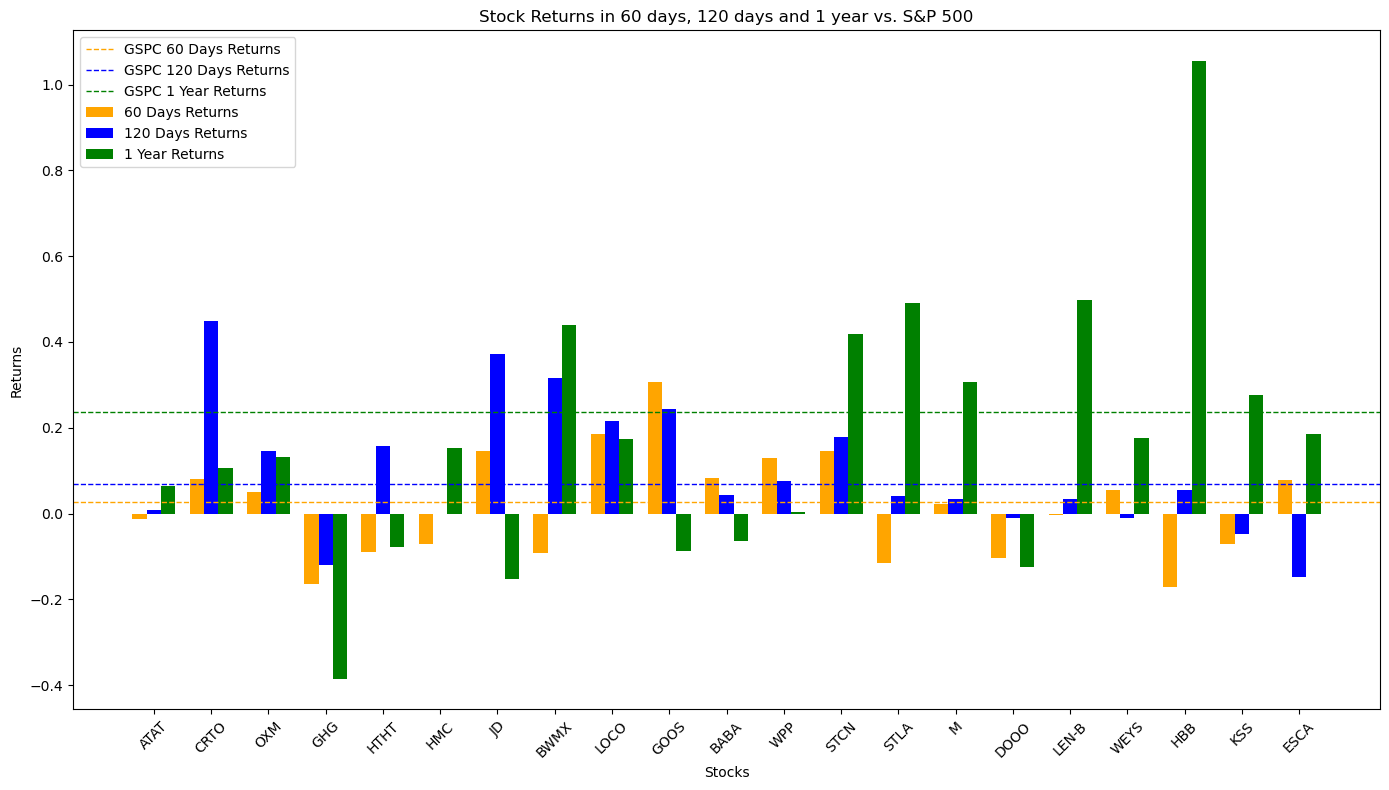

In [55]:
import numpy as np
import matplotlib.pyplot  as plt

plot_data = df_returns.iloc[:-1]

bar_width = 0.25  
index = np.arange(len(plot_data['Code'])) 

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(index - bar_width, plot_data['60 Days'], bar_width, label='60 Days Returns', color = 'orange')
rects2 = ax.bar(index, plot_data['120 Days'], bar_width, label='120 Days Returns', color = 'blue')
rects3 = ax.bar(index + bar_width, plot_data['1 Year'], bar_width, label='1 Year Returns', color = 'green')

ax.axhline(y=GSPC_returns[0], color='orange', linestyle='--', linewidth=1, label='GSPC 60 Days Returns')
ax.axhline(y=GSPC_returns[1], color='blue', linestyle='--', linewidth=1, label='GSPC 120 Days Returns')
ax.axhline(y=GSPC_returns[2], color='green', linestyle='--', linewidth=1, label='GSPC 1 Year Returns')

ax.set_xlabel('Stocks')
ax.set_ylabel('Returns')
ax.set_title('Stock Returns in 60 days, 120 days and 1 year vs. S&P 500')
ax.set_xticks(index)
ax.set_xticklabels(plot_data['Code'], rotation=45) 
ax.legend() 

plt.tight_layout() 
plt.savefig('Returns.png')
plt.show()

In [56]:
size = plot_data['60 Days'].size
benefit_60_days = np.sum(plot_data['60 Days'])/size
benefit_120_days = np.sum(plot_data['120 Days'])/size
benefit_1_year = np.sum(plot_data['1 Year'])/size
benefit_GPSC_60 = GSPC_returns[0]
benefit_GPSC_120 = GSPC_returns[1]
benefit_GPSC_1_Y = GSPC_returns[2]
print(f"Return for Investing in Best-Stocks Portfolios in 60 days is {benefit_60_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 60 days is {benefit_GPSC_60 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 120 days is {benefit_120_days * 100:.2f}%")
print(f"Return for Investing in S&P500 in 120 days is {benefit_GPSC_120 * 100:.2f}%")
print(f"Return for Investing in Best-Stocks Portfolios in 1 year is {benefit_1_year * 100:.2f}%")
print(f"Return for Investing in S&P500 in 1 year is {benefit_GPSC_1_Y * 100:.2f}%")

Return for Investing in Best-Stocks Portfolios in 60 days is 1.79%
Return for Investing in S&P500 in 60 days is 2.65%
Return for Investing in Best-Stocks Portfolios in 120 days is 9.68%
Return for Investing in S&P500 in 120 days is 6.89%
Return for Investing in Best-Stocks Portfolios in 1 year is 17.08%
Return for Investing in S&P500 in 1 year is 23.62%


In [8]:
GSPC_List = pd.read_csv('../GSPC.csv')
date_list = GSPC_List['Date']
GSPC_returns = GSPC_List['Returns']

In [9]:
code_list = final_selection['Code']
print(code_list)

1      ATAT
2      CRTO
15      OXM
18      GHG
27     HTHT
30      HMC
37       JD
38     BWMX
44     LOCO
52     GOOS
55     BABA
56      WPP
57     STCN
62     STLA
64        M
68     DOOO
78    LEN-B
83     WEYS
85      HBB
87      KSS
89     ESCA
Name: Code, dtype: object


In [10]:
error_list = []
def get_price_list(stock, time_list, initial_price):
    price_list = []
    for date in time_list:
        try: 
            price = float(api.get_eod_historical_stock_market_data(symbol = stock, from_date = date, to_date= date)[0]['adjusted_close'])
            returns = (price - initial_price) / initial_price
            price_list.append([date, price,returns])
        except Exception as e:
            error_list.append([stock, date])
            price_list.append([date, 0, 0])
            print(f'{stock} on {date} error :{e}')
            continue
    return price_list

In [11]:
all_profolio = []
for s in code_list:
    initial_price = float(api.get_eod_historical_stock_market_data(symbol= s, from_date = date_list[0], to_date = date_list[0])[0]['adjusted_close'])
    stock_performance = get_price_list(s, date_list, initial_price)
    returns = [sublist[2] for sublist in stock_performance]
    all_profolio.append(returns)

In [12]:
print(len(all_profolio))

21


In [13]:
import numpy as np
n = len(date_list)
sum = np.zeros(n) 
for i in all_profolio:
    returns = np.array(i)
    sum += returns
total = sum / len(all_profolio)
print(total)

[ 0.          0.03572988  0.04238195  0.03457915  0.0690119   0.0653479
  0.092691    0.1158124   0.17092106  0.15783065  0.13290311  0.09152238
  0.08504109  0.09109211  0.06185783  0.0699591   0.05094996  0.04769523
  0.0324386   0.03939358  0.00900001 -0.00690445  0.02331289  0.00707942
  0.07209161  0.05961315  0.06821137  0.08319354  0.11394647  0.14511543
  0.11618517  0.10756457  0.07991686  0.09482331  0.11137399  0.08565133
  0.12562512  0.13228806  0.14644521  0.14815098  0.15857944  0.16945582
  0.21106294  0.2209855   0.19359758  0.14953565  0.16963453  0.18273196
  0.21896061  0.19882026  0.20238096  0.18508365  0.17076633]


In [14]:
import json
listofcodes = code_list.tolist()
all_returns_dict = {listofcodes[i]: all_profolio[i] for i in range(len(all_profolio))}
all_returns_dict['Average'] = total.tolist()

with open('returns.json', 'w') as json_file:
    json.dump(all_returns_dict, json_file, indent=4)

In [16]:
import pandas as pd

df = pd.read_json('returns.json')
total = df['Average']

std = np.std(total)
print(f'Standard Deviation of {sector_title} is: ', std)

Standard Deviation of Consumer Cyclical sector is:  0.061393048047028685


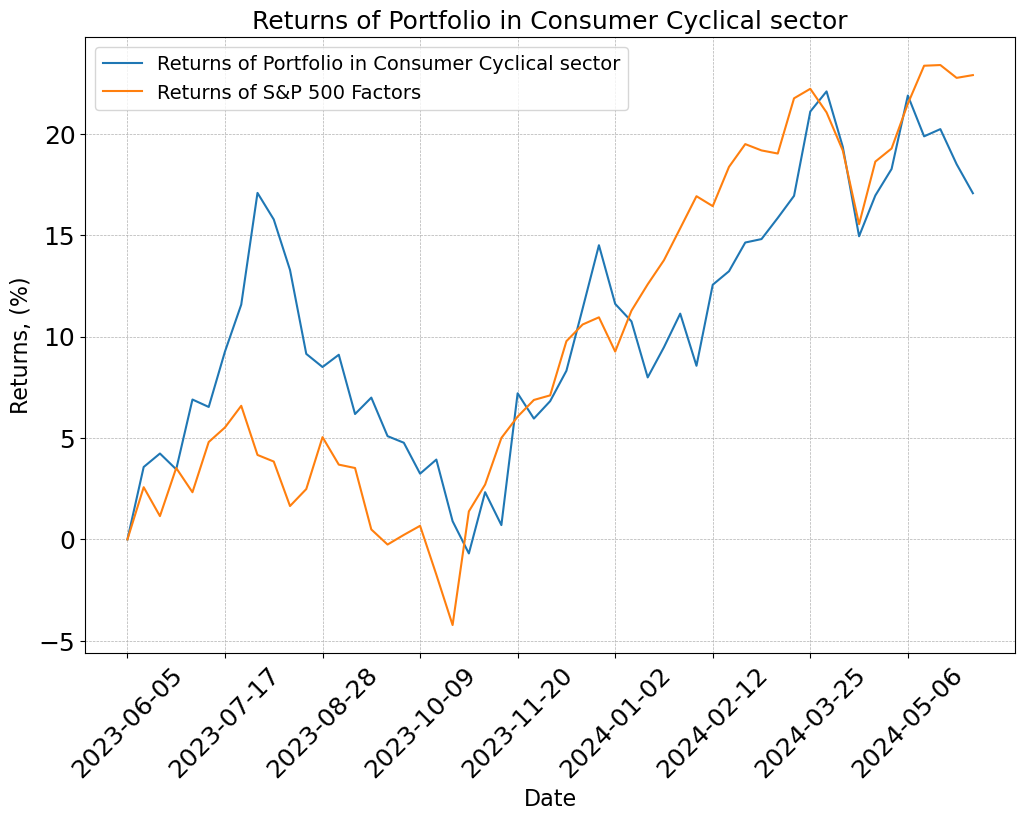

In [15]:
import matplotlib.pyplot as plt
weeks = range(len(date_list))
sector_title = f'{sector} sector'
plt.figure(figsize=(12, 8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Returns, (%)',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.grid(which='both', linestyle='--', linewidth=0.5)


plt.plot(date_list, total * 100, label = f'Returns of Portfolio in {sector_title}')
plt.plot(date_list, GSPC_returns*100, label = f'Returns of S&P 500 Factors')
plt.legend(fontsize=14)
plt.title('Returns of Portfolio in ' + sector_title , fontsize=18)

interval = 6 
plt.xticks(ticks=date_list[::interval], labels=date_list[::interval], rotation=45)
plt.savefig('Portfolio_Returns', bbox_inches='tight')
plt.show()